In [17]:
import math
import numpy as np
import seaborn as sns
import scipy.stats as stats
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

%matplotlib inline

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['axes.linewidth'] = 1.0

## OOD Detection

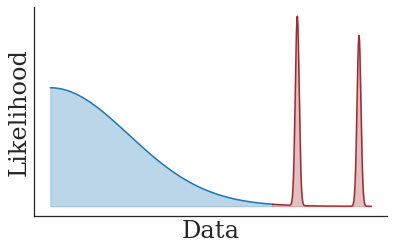

In [95]:
def gaussian_pdf(x, mu=0, sigma=1):
    return np.exp(-(x-mu)**2 / sigma) / (np.sqrt(2*np.pi) * sigma)
def one_d_density(x):
    mu_1, sigma_1 = 0, 0.8
    mu_2, sigma_2 = 2, 0.0005
    mu_3 = 2.5
    y = 1000*gaussian_pdf(x, mu_1, sigma_1) + gaussian_pdf(x, mu_2, sigma_2) + 0.9*gaussian_pdf(x, mu_3, sigma_2)
    return y

sns.set(font_scale=2.0, style='ticks')

cutoff = 1.8
x1 = np.linspace(0, cutoff, 200)
y1 = one_d_density(x1)
x2 = np.linspace(cutoff, 2.6, 200)
y2 = one_d_density(x2)

sns.set_style(style='white')
ax = sns.lineplot(x=x1, y=y1, color="#1F78B4")
ax = sns.lineplot(x=x2, y=y2, color="#A02C30")

l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax.fill_between(x1, y1, color="#1F78B4", alpha=0.3)
ax.fill_between(x2, y2, color="#A02C30", alpha=0.3)
ax.set_xticks([]) 
ax.set_yticks([])
plt.xlabel('Data', fontdict={'family': 'serif'})
plt.ylabel('Likelihood', fontdict={'family': 'serif'})
sns.despine(ax=ax, offset=0)

plt.tight_layout()
plt.savefig('./ood_fig1a.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [96]:
# Curve defining manifold
def curve(x):
    return ((x-5.0)**2 - 1)**(0.5) - 5.0

# Define manifold extent in 2d
fineness = 400 # increase for paper-ready figs to smooth out densities
xs = np.linspace(0, 0.5, fineness)
ys = curve(xs)

# Define additional OOD points
ood_pt1 = [0.8, 1.0]
ood_pt2 = [1.2, 0.9]

# Manifold overfitted density
sigma = 0.5
ood_sigma = 0.02

def p(x, y, xs=xs, ys=ys, sigma=sigma):
    x = np.reshape(x, (1, -1))
    y = np.reshape(y, (1, -1))
    xs = np.reshape(xs, (-1, 1))
    ys = np.reshape(ys, (-1, 1))
    dists = np.sqrt((x - xs)**2 + (y - ys)**2)
    shortest_dists = np.min(dists, axis=0)
    return scipy.stats.norm.pdf(shortest_dists, 0, sigma)

def p_pt(x, y, ood_pt=[0., 0.], sigma=ood_sigma):
    x = np.reshape(x, (1, -1))
    y = np.reshape(y, (1, -1))
    dists = np.sqrt((x - ood_pt[0])**2 + (y - ood_pt[1])**2)
    shortest_dists = np.min(dists, axis=0)
    return scipy.stats.norm.pdf(shortest_dists, 0, sigma)

x = np.linspace(-0.2, 1.3, fineness)
y = np.linspace(-0.2, 1.1, fineness)
X, Y = np.meshgrid(x, y)
zs = np.array(p(np.ravel(X), np.ravel(Y)) + 
              0.05*(p_pt(np.ravel(X), np.ravel(Y), ood_pt=ood_pt1) + p_pt(np.ravel(X), np.ravel(Y), ood_pt=ood_pt2)))
Z = zs.reshape(X.shape)

/tmp/ipykernel_10010/3933648751.py:34: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:
/tmp/ipykernel_10010/3933648751.py:34: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:
/tmp/ipykernel_10010/3933648751.py:34: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:


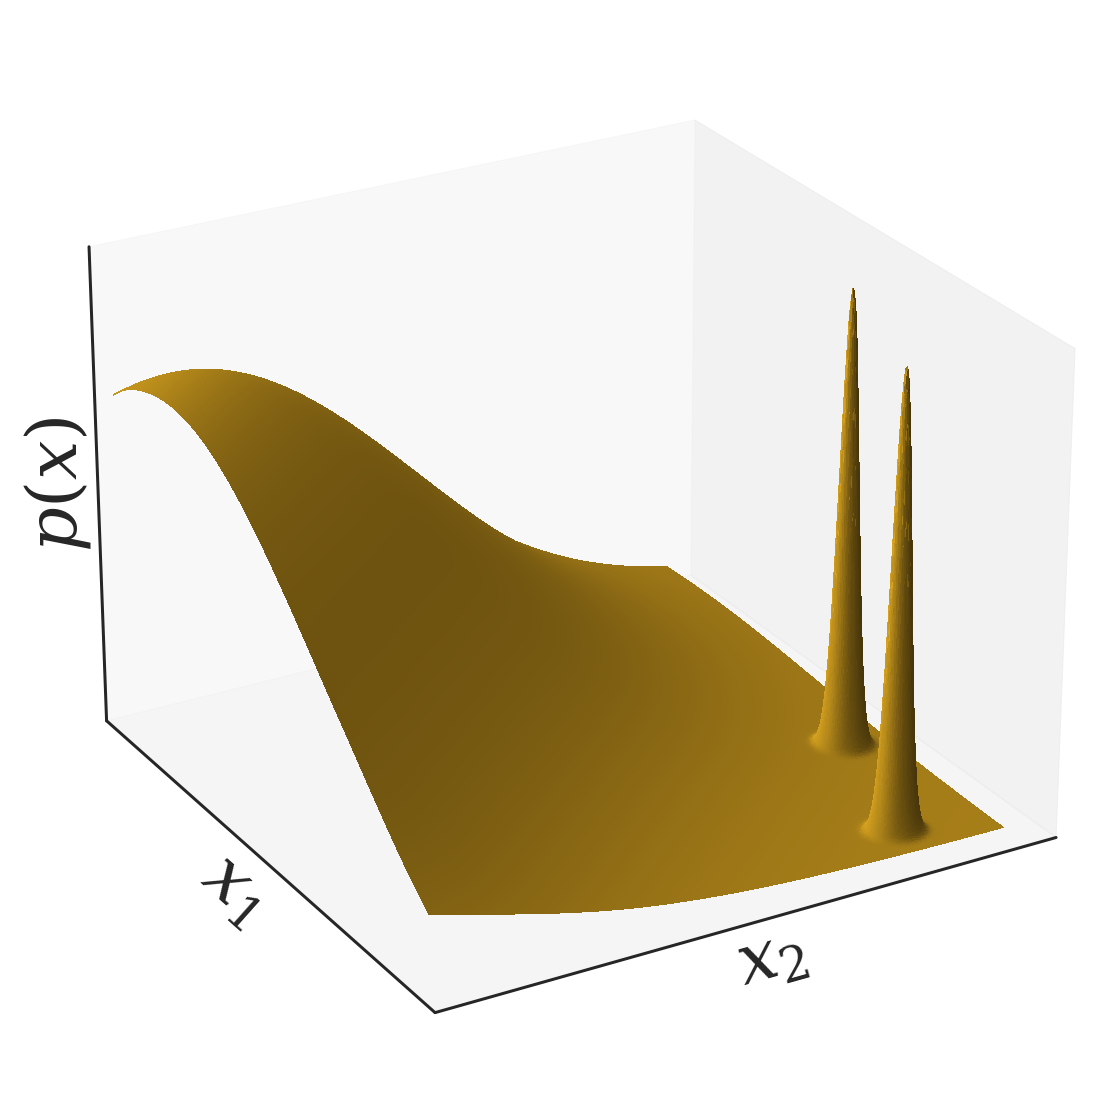

In [97]:
# Set up plot
linewidth = 10
fontsize = 70

fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(25, 330)
# Position z-axis to the LHS
tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = (tmp_planes[2], tmp_planes[3], 
                    tmp_planes[0], tmp_planes[1], 
                    tmp_planes[4], tmp_planes[5])

# labels
ax.set_xlabel(r'$x_1$', fontsize=fontsize)
ax.set_ylabel(r'$x_2$', fontsize=fontsize)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$p(x)$', fontsize=fontsize, rotation=90)

# plot limits
ax.set_xlim3d((-0.2, 1.35))
ax.set_ylim3d((-0.2, 1.15))
ax.set_zlim3d((0.012, 1.0*Z.max()))

ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Plot density
surf = ax.plot_surface(X, Y, Z, rcount=fineness, ccount=fineness, linewidth=0.0, alpha=1.0, color='#daa520', antialiased=False)
surf._facecolors2d = surf._facecolor3d
surf._edgecolors2d = surf._edgecolor3d

for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:
    axis.line.set_linewidth(3)

plt.tight_layout()
plt.savefig('./ood_fig1b.png', bbox_inches='tight', pad_inches=0)

In [98]:
# Curve defining manifold
def curve(x):
    return ((x-5.0)**2 - 1)**(0.5) - 5.0

# Define manifold extent in 2d
fineness = 400 # increase for paper-ready figs to smooth out densities
xs = np.linspace(0, 0.5, fineness)
ys = curve(xs)

# Define additional OOD points
ood_pt1 = [0.8, 1.0]
ood_pt2 = [1.2, 0.9]

# Manifold overfitted density
sigma = 0.5
ood_sigma = 0.02

def p(x, y, xs=xs, ys=ys, sigma=sigma):
    x = np.reshape(x, (1, -1))
    y = np.reshape(y, (1, -1))
    xs = np.reshape(xs, (-1, 1))
    ys = np.reshape(ys, (-1, 1))
    dists = np.sqrt((x - xs)**2 + (y - ys)**2)
    shortest_dists = np.min(dists, axis=0)
    return scipy.stats.norm.pdf(shortest_dists, 0, sigma)

def p_pt(x, y, ood_pt=[0., 0.], sigma=ood_sigma):
    x = np.reshape(x, (1, -1))
    y = np.reshape(y, (1, -1))
    dists = np.sqrt((x - ood_pt[0])**2 + (y - ood_pt[1])**2)
    shortest_dists = np.min(dists, axis=0)
    return scipy.stats.norm.pdf(shortest_dists, 0, sigma)

x = np.linspace(-0.2, 1.3, fineness)
y = np.linspace(-0.2, 1.1, fineness)
X, Y = np.meshgrid(x, y)
zs = np.array(p(np.ravel(X), np.ravel(Y)) + 
              0.05*(p_pt(np.ravel(X), np.ravel(Y), ood_pt=ood_pt1) + p_pt(np.ravel(X), np.ravel(Y), ood_pt=ood_pt2)))
Z = zs.reshape(X.shape)

/tmp/ipykernel_10010/3933648751.py:34: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:
/tmp/ipykernel_10010/3933648751.py:34: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:
/tmp/ipykernel_10010/3933648751.py:34: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:


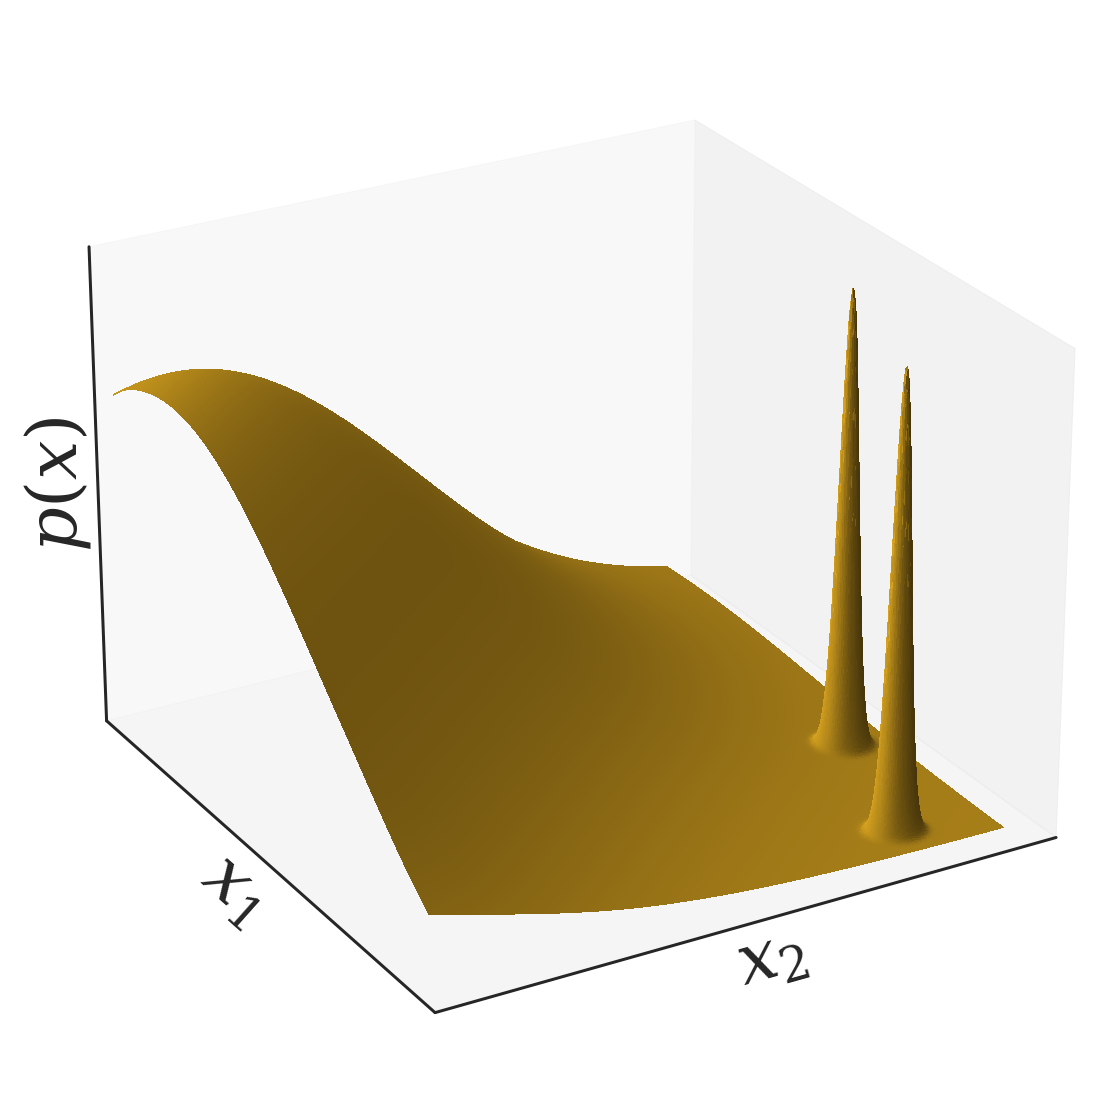

In [99]:
# Set up plot
linewidth = 10
fontsize = 70

fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(25, 330)
# Position z-axis to the LHS
tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = (tmp_planes[2], tmp_planes[3], 
                    tmp_planes[0], tmp_planes[1], 
                    tmp_planes[4], tmp_planes[5])

# labels
ax.set_xlabel(r'$x_1$', fontsize=fontsize)
ax.set_ylabel(r'$x_2$', fontsize=fontsize)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$p(x)$', fontsize=fontsize, rotation=90)

# plot limits
ax.set_xlim3d((-0.2, 1.35))
ax.set_ylim3d((-0.2, 1.15))
ax.set_zlim3d((0.012, 1.0*Z.max()))

ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Plot density
surf = ax.plot_surface(X, Y, Z, rcount=fineness, ccount=fineness, linewidth=0.0, alpha=1.0, color='#daa520', antialiased=False)
surf._facecolors2d = surf._facecolor3d
surf._edgecolors2d = surf._edgecolor3d

for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:
    axis.line.set_linewidth(3)

plt.tight_layout()
plt.savefig('./ood_fig1b.png', bbox_inches='tight', pad_inches=0)